# **Mount Google Drive**

In [ ]:
!fusermount -u /content/drive
!rm -rf /content/drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

fusermount: failed to unmount /content/drive: No such file or directory
Mounted at /content/drive


# **Set Project Directory**

In [ ]:
import os

project_dir = "/content/drive/MyDrive/MIA_Project"
os.makedirs(project_dir, exist_ok=True)
print(f"Project directory set at: {project_dir}")

Project directory set at: /content/drive/MyDrive/MIA_Project


# **Install & Upgrade Required Packages**

In [ ]:
!pip install medmnist
!pip uninstall torch torchvision torchaudio -y
!pip install --upgrade torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256

# **Download, Move and List MedMNIST Datasets**

In [ ]:
import medmnist
from medmnist import INFO
import os
import shutil

# Temporary storage in Colab
temp_dataset_path = "/content/dataset"

# Google Drive destination
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Ensure the dataset directory exists
os.makedirs(temp_dataset_path, exist_ok=True)
os.makedirs(dataset_path, exist_ok=True)

# List of all 4 datasets
DATASETS = [
    "octmnist","pneumoniamnist", "breastmnist", "retinamnist"
]

# Download and save all datasets in temp storage
for dataset_name in DATASETS:
    dataset_class = getattr(medmnist, INFO[dataset_name]["python_class"])

    # Download train, val splits
    dataset_class(split="train", download=True, root=temp_dataset_path)
    dataset_class(split="val", download=True, root=temp_dataset_path)

    print(f"{dataset_name} downloaded in temp storage at {temp_dataset_path}")

# Move datasets from temp storage to Google Drive
for file in os.listdir(temp_dataset_path):
    shutil.move(os.path.join(temp_dataset_path, file), dataset_path)

print(f"All datasets moved to {dataset_path}")

100%|██████████| 54.9M/54.9M [00:04<00:00, 12.5MB/s]


octmnist downloaded in temp storage at /content/dataset


100%|██████████| 4.17M/4.17M [00:01<00:00, 3.64MB/s]


pneumoniamnist downloaded in temp storage at /content/dataset


100%|██████████| 560k/560k [00:00<00:00, 706kB/s]


breastmnist downloaded in temp storage at /content/dataset


100%|██████████| 3.29M/3.29M [00:01<00:00, 2.93MB/s]


retinamnist downloaded in temp storage at /content/dataset
All datasets moved to /content/drive/MyDrive/MIA_Project/dataset


In [ ]:
!ls -lh /content/

import os

dataset_path = "/content/drive/MyDrive/MIA_Project/dataset"
print(os.listdir(dataset_path))

total 12K
drwxr-xr-x 2 root root 4.0K Apr  6 10:36 dataset
drwx------ 6 root root 4.0K Apr  6 10:33 drive
drwxr-xr-x 1 root root 4.0K Apr  3 13:37 sample_data
['pneumoniamnist.npz', 'retinamnist.npz', 'octmnist.npz', 'breastmnist.npz']


# **Dataset Information**

In [ ]:
import medmnist
from medmnist import INFO
import numpy as np

# Define datasets
DATASETS = ["octmnist", "pneumoniamnist", "breastmnist", "retinamnist"]

# Function to load and inspect dataset
def inspect_dataset(dataset_name):
    dataset_class = getattr(medmnist, INFO[dataset_name]["python_class"])
    dataset_train = dataset_class(split="train", root=dataset_path, download=False)
    dataset_val = dataset_class(split="val", root=dataset_path, download=False)

    print(f"\nDataset: {dataset_name}")
    print(f"Train set size: {len(dataset_train)}")
    print(f"Validation set size: {len(dataset_val)}")
    # Convert the PIL Image to a NumPy array using np.array
    print(f"Image shape: {np.array(dataset_train[0][0]).shape}")
    print(f"Number of classes: {len(INFO[dataset_name]['label'])}")
    print(f"classes: {INFO[dataset_name]['label']}")

# Inspect each dataset
for dataset in DATASETS:
    inspect_dataset(dataset)


Dataset: octmnist
Train set size: 97477
Validation set size: 10832
Image shape: (28, 28)
Number of classes: 4
classes: {'0': 'choroidal neovascularization', '1': 'diabetic macular edema', '2': 'drusen', '3': 'normal'}

Dataset: pneumoniamnist
Train set size: 4708
Validation set size: 524
Image shape: (28, 28)
Number of classes: 2
classes: {'0': 'normal', '1': 'pneumonia'}

Dataset: breastmnist
Train set size: 546
Validation set size: 78
Image shape: (28, 28)
Number of classes: 2
classes: {'0': 'malignant', '1': 'normal, benign'}

Dataset: retinamnist
Train set size: 1080
Validation set size: 120
Image shape: (28, 28, 3)
Number of classes: 5
classes: {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}


# **Preprocessing Techniques**

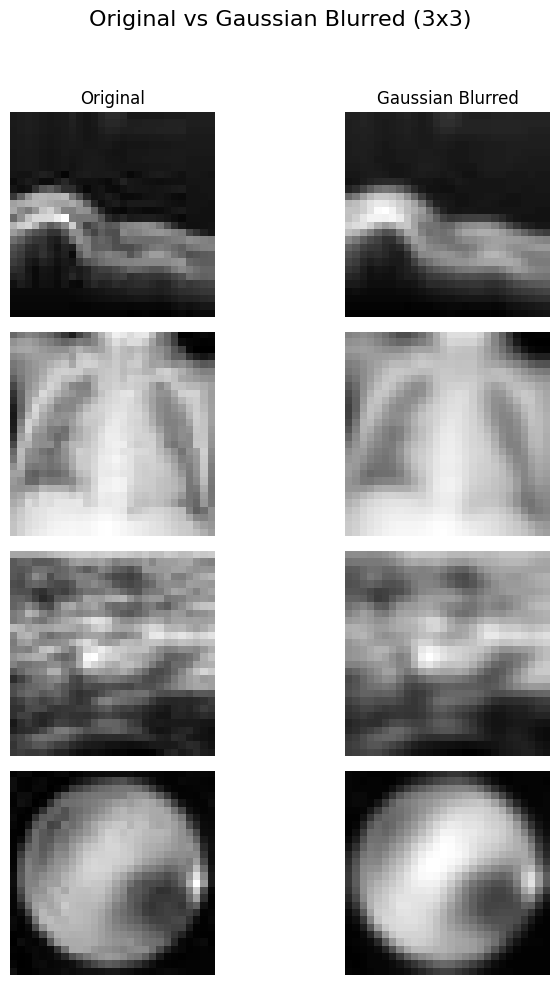

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Dataset path
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Dataset list
DATASETS = {
    "octmnist": (4, [0, 1, 2, 3]),
    "pneumoniamnist": (2, [4, 5]),
    "breastmnist": (2, [6, 7]),
    "retinamnist": (5, [8, 9, 10, 11, 12])
}

def preprocess_image(img):
    """
    Applies Gaussian blur with kernel size (3, 3) to the image.
    """
    img = img.astype(np.uint8)
    blurred = cv2.GaussianBlur(img, (3, 3), 0)
    return blurred

# Plotting: Original and enhanced image per dataset
fig, axes = plt.subplots(len(DATASETS), 2, figsize=(8, 10))
fig.suptitle("Original vs Gaussian Blurred (3x3)", fontsize=16)

row = 0
for dataset_name in DATASETS.keys():
    dataset_file = os.path.join(dataset_path, f"{dataset_name}.npz")
    with np.load(dataset_file, allow_pickle=True) as data:
        train_images = data["train_images"]

    # Convert RGB to grayscale if needed
    if train_images.ndim == 4 and train_images.shape[-1] == 3:
        train_images = np.mean(train_images, axis=-1)

    # Use the first image for each dataset
    original = train_images[0]
    enhanced = preprocess_image(original)

    for col, img in enumerate([original, enhanced]):
        ax = axes[row, col]
        ax.imshow(img, cmap="gray")
        ax.axis("off")
        if row == 0:
            ax.set_title(["Original", "Gaussian Blurred"][col])

    axes[row, 0].set_ylabel(dataset_name.upper(), fontsize=13, rotation=90, labelpad=10)
    row += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Combine Datasets**

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image

# Path where datasets are saved
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Global label mapping
global_label_mapping = {
    0: "choroidal neovascularization",
    1: "diabetic macular edema",
    2: "drusen",
    3: "normal (OCT)",
    4: "normal (Pneumonia)",
    5: "pneumonia",
    6: "malignant",
    7: "normal, benign (Breast)",
    8: "Retina 0",
    9: "Retina 1",
    10: "Retina 2",
    11: "Retina 3",
    12: "Retina 4"
}

# List of datasets with label offsets
DATASETS = {
    "octmnist": (4, [0, 1, 2, 3]),
    "pneumoniamnist": (2, [4, 5]),
    "breastmnist": (2, [6, 7]),
    "retinamnist": (5, [8, 9, 10, 11, 12])
}

# Storage for combined images and labels
train_images_list, train_labels_list = [], []
val_images_list, val_labels_list = [], []

# Load and process each dataset
for dataset_name, (num_classes, label_offsets) in DATASETS.items():
    dataset_file = os.path.join(dataset_path, f"{dataset_name}.npz")

    # Load .npz file
    with np.load(dataset_file, allow_pickle=True) as data:
        train_images = data["train_images"]
        train_labels = data["train_labels"]
        val_images = data["val_images"]
        val_labels = data["val_labels"]

    # Convert to grayscale if necessary
    if train_images.ndim == 4 and train_images.shape[-1] == 3:  # RGB -> Grayscale
        train_images = np.mean(train_images, axis=-1)
        val_images = np.mean(val_images, axis=-1)

    # Normalize & Store Label Index
    for img, label in zip(train_images, train_labels):
        img_pil = Image.fromarray(img.astype(np.uint8))  # Convert NumPy array to PIL Image
        img_tensor = transform(img_pil)  # Apply transform to PIL Image
        class_index = label_offsets[int(label[0])]  # Get class index
        train_images_list.append(img_tensor.squeeze(0).numpy())  # Remove singleton dim
        train_labels_list.append(class_index)

    for img, label in zip(val_images, val_labels):
        img_pil = Image.fromarray(img.astype(np.uint8))  # Convert NumPy array to PIL Image
        img_tensor = transform(img_pil)  # Apply transform to PIL Image
        class_index = label_offsets[int(label[0])]  # Get class index
        val_images_list.append(img_tensor.squeeze(0).numpy())
        val_labels_list.append(class_index)

# Convert lists to NumPy arrays
train_images_array = np.array(train_images_list)
train_labels_array = np.array(train_labels_list, dtype=np.int64)  # Ensure integer type
val_images_array = np.array(val_images_list)
val_labels_array = np.array(val_labels_list, dtype=np.int64)  # Ensure integer type

# Save the combined dataset as .npz
np.savez_compressed(os.path.join(dataset_path, "combined_dataset.npz"),
                    train_images=train_images_array, train_labels=train_labels_array,
                    val_images=val_images_array, val_labels=val_labels_array)

print(f"Combined dataset saved at: {dataset_path}/combined_dataset.npz")
print(f"Train Samples: {len(train_images_array)}, Validation Samples: {len(val_images_array)}")

Combined dataset saved at: /content/drive/MyDrive/MIA_Project/dataset/combined_dataset.npz
Train Samples: 103811, Validation Samples: 11554


# **Combine (Preprocessed) Datasets**

Enhanced dataset saved at: /content/drive/MyDrive/MIA_Project/dataset/pre_combined_dataset.npz
Train Samples: 103811, Validation Samples: 11554


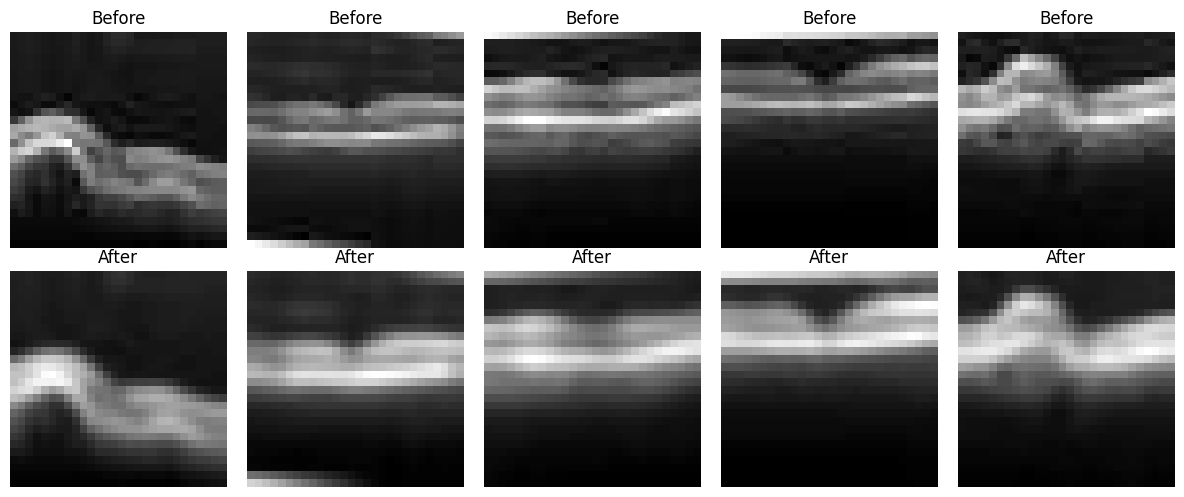

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Path where datasets are saved
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# List of datasets with label offsets
DATASETS = {
    "octmnist": (4, [0, 1, 2, 3]),
    "pneumoniamnist": (2, [4, 5]),
    "breastmnist": (2, [6, 7]),
    "retinamnist": (5, [8, 9, 10, 11, 12])
}

# Storage for images and labels
original_train_images_list, train_images_list, train_labels_list = [], [], []
original_val_images_list, val_images_list, val_labels_list = [], [], []

def apply_gaussian_blur(img):
    """
    Apply Gaussian blur with kernel size (3, 3).
    """
    img = img.astype(np.uint8)
    return cv2.GaussianBlur(img, (3, 3), 0)

# Load and process each dataset
for dataset_name, (num_classes, label_offsets) in DATASETS.items():
    dataset_file = os.path.join(dataset_path, f"{dataset_name}.npz")

    with np.load(dataset_file, allow_pickle=True) as data:
        train_images = data["train_images"]
        train_labels = data["train_labels"]
        val_images = data["val_images"]
        val_labels = data["val_labels"]

    if train_images.ndim == 4 and train_images.shape[-1] == 3:
        train_images = np.mean(train_images, axis=-1)
        val_images = np.mean(val_images, axis=-1)

    for img, label in zip(train_images, train_labels):
        img = img.astype(np.uint8)
        original_train_images_list.append(img.copy())

        enhanced = apply_gaussian_blur(img)
        img_tensor = transform(Image.fromarray(enhanced))

        class_index = label_offsets[int(label[0])]
        train_images_list.append(img_tensor.squeeze(0).numpy())
        train_labels_list.append(class_index)

    for img, label in zip(val_images, val_labels):
        img = img.astype(np.uint8)
        original_val_images_list.append(img.copy())

        enhanced = apply_gaussian_blur(img)
        img_tensor = transform(Image.fromarray(enhanced))

        class_index = label_offsets[int(label[0])]
        val_images_list.append(img_tensor.squeeze(0).numpy())
        val_labels_list.append(class_index)

# Convert lists to NumPy arrays
original_train_images_array = np.array(original_train_images_list)
train_images_array = np.array(train_images_list)
train_labels_array = np.array(train_labels_list, dtype=np.int64)

original_val_images_array = np.array(original_val_images_list)
val_images_array = np.array(val_images_list)
val_labels_array = np.array(val_labels_list, dtype=np.int64)

# Save the enhanced dataset
np.savez_compressed(os.path.join(dataset_path, "pre_combined_dataset.npz"),
                    train_images=train_images_array, train_labels=train_labels_array,
                    val_images=val_images_array, val_labels=val_labels_array)

print(f"Enhanced dataset saved at: {dataset_path}/pre_combined_dataset.npz")
print(f"Train Samples: {len(train_images_array)}, Validation Samples: {len(val_images_array)}")

# Display 5 images before and after enhancement
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(5):
    axes[0, i].imshow(original_train_images_array[i], cmap="gray")
    axes[0, i].set_title("Before")
    axes[0, i].axis("off")

    axes[1, i].imshow(train_images_array[i], cmap="gray")
    axes[1, i].set_title("After")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# **Load Dataset**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Path to the combined dataset in Google Drive
combined_dataset_path = "/content/drive/MyDrive/MIA_Project/dataset/combined_dataset.npz"

# Load the combined dataset
data = np.load(combined_dataset_path)

train_images = data["train_images"]
train_labels = data["train_labels"]
val_images = data["val_images"]
val_labels = data["val_labels"]

# Check dataset properties
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation labels shape: {val_labels.shape}")

num_classes = train_labels.shape[1] if len(train_labels.shape) > 1 else len(np.unique(train_labels))
print(f"Number of classes: {num_classes}")

# Define Custom Dataset
class MedicalDataset(Dataset):
    def __init__(self, images, labels):
        # Check if images need resizing to 224x224 for ResNet18
        self.images = torch.tensor(images, dtype=torch.float32).unsqueeze(1)  # Add channel dim
        self.labels = torch.tensor(labels, dtype=torch.float32)  # One-hot labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

# Create Dataset Objects
train_dataset = MedicalDataset(train_images, train_labels)
val_dataset = MedicalDataset(val_images, val_labels)

# Define DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}, Validation dataset size: {len(val_dataset)}")

Train images shape: (103811, 28, 28)
Validation images shape: (11554, 28, 28)
Train labels shape: (103811,)
Validation labels shape: (11554,)
Number of classes: 13
Train dataset size: 103811, Validation dataset size: 11554


# **Load (Preprocessed) Dataset**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

#  Path to the enhanced dataset
enhanced_dataset_path = "/content/drive/MyDrive/MIA_Project/dataset/pre_combined_dataset.npz"

#  Load the enhanced dataset
data = np.load(enhanced_dataset_path)

pre_train_images = data["train_images"]
pre_train_labels = data["train_labels"]
pre_val_images = data["val_images"]
pre_val_labels = data["val_labels"]

#  Check dataset properties
print(f"Train images shape: {pre_train_images.shape}")
print(f"Validation images shape: {pre_val_images.shape}")
print(f"Train labels shape: {pre_train_labels.shape}")
print(f"Validation labels shape: {pre_val_labels.shape}")

pre_num_classes = pre_train_labels.shape[1] if len(pre_train_labels.shape) > 1 else len(np.unique(pre_train_labels))
print(f"Number of classes: {pre_num_classes}")

#  Custom Dataset
class MedicalDataset(Dataset):
    def __init__(self, images, labels):
        self.images = torch.tensor(images, dtype=torch.float32).unsqueeze(1)  # Add channel dim (1xHxW)
        self.labels = torch.tensor(labels, dtype=torch.long)  # Integer class labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

#  Create Dataset objects
pre_train_dataset = MedicalDataset(pre_train_images, pre_train_labels)
pre_val_dataset = MedicalDataset(pre_val_images, pre_val_labels)

#  DataLoaders
pre_train_loader = DataLoader(pre_train_dataset, batch_size=32, shuffle=True)
pre_val_loader = DataLoader(pre_val_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(pre_train_dataset)}, Validation dataset size: {len(pre_val_dataset)}")

Train images shape: (103811, 28, 28)
Validation images shape: (11554, 28, 28)
Train labels shape: (103811,)
Validation labels shape: (11554,)
Number of classes: 13
Train dataset size: 103811, Validation dataset size: 11554


# **Train ResNet18**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "combined_dataset.npz"))

train_images, train_labels = data["train_images"], data["train_labels"]
val_images, val_labels = data["val_images"], data["val_labels"]

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])

        # Convert grayscale (H, W) → (1, H, W)
        img = np.expand_dims(img, axis=0).astype(np.float32)

        img = torch.from_numpy(img)
        return img, label

# Create dataset and dataloaders
batch_size = 64
train_dataset = CustomDataset(train_images, train_labels)
val_dataset = CustomDataset(val_images, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)

        # Modify first convolution layer to accept grayscale input (1 channel)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify final layer for classification
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
num_classes = 13
model = ModifiedResNet18(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}")

# Save model
model_dir = "/content/drive/MyDrive/MIA_Project/model"
os.makedirs(model_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_dir, "resnet18_model.pth"))
print("Model saved successfully!")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.5891, Train Acc: 0.8014
Epoch [2/10], Loss: 0.4264, Train Acc: 0.8526
Epoch [3/10], Loss: 0.3684, Train Acc: 0.8715
Epoch [4/10], Loss: 0.3691, Train Acc: 0.8748
Epoch [5/10], Loss: 0.3526, Train Acc: 0.8787
Epoch [6/10], Loss: 0.3215, Train Acc: 0.8883
Epoch [7/10], Loss: 0.3049, Train Acc: 0.8932
Epoch [8/10], Loss: 0.2718, Train Acc: 0.9051
Epoch [9/10], Loss: 0.2779, Train Acc: 0.9026
Epoch [10/10], Loss: 0.2391, Train Acc: 0.9162
Model saved successfully!


# **Train ResNet18 (Preprocessed)**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "pre_combined_dataset.npz"))

pre_train_images, pre_train_labels = data["train_images"], data["train_labels"]
pre_val_images, pre_val_labels = data["val_images"], data["val_labels"]

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])

        # Convert grayscale (H, W) → (1, H, W)
        img = np.expand_dims(img, axis=0).astype(np.float32)

        img = torch.from_numpy(img)
        return img, label

# Create dataset and dataloaders
batch_size = 64
pre_train_dataset = CustomDataset(pre_train_images, pre_train_labels)
pre_val_dataset = CustomDataset(pre_val_images, pre_val_labels)

pre_train_loader = DataLoader(pre_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
pre_val_loader = DataLoader(pre_val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)

        # Modify first convolution layer to accept grayscale input (1 channel)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify final layer for classification
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
num_classes = 13
model = ModifiedResNet18(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in pre_train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    pre_train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(pre_train_loader):.4f}, Train Acc: {pre_train_acc:.4f}")

# Save model
model_dir = "/content/drive/MyDrive/MIA_Project/model"
os.makedirs(model_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_dir, "resnet18_preprocessed_model.pth"))
print("Model saved successfully!")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 183MB/s]


Epoch [1/10], Loss: 0.6317, Train Acc: 0.7843
Epoch [2/10], Loss: 0.4726, Train Acc: 0.8374
Epoch [3/10], Loss: 0.4111, Train Acc: 0.8558
Epoch [4/10], Loss: 0.3823, Train Acc: 0.8662
Epoch [5/10], Loss: 0.3836, Train Acc: 0.8649
Epoch [6/10], Loss: 0.3456, Train Acc: 0.8770
Epoch [7/10], Loss: 0.3430, Train Acc: 0.8803
Epoch [8/10], Loss: 0.3035, Train Acc: 0.8922
Epoch [9/10], Loss: 0.3060, Train Acc: 0.8917
Epoch [10/10], Loss: 0.2608, Train Acc: 0.9081
Model saved successfully!


# **Finetune ResNet18 on Validation Data**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "combined_dataset.npz"))

train_images, train_labels = data["train_images"], data["train_labels"]
val_images, val_labels = data["val_images"], data["val_labels"]

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Create dataset and dataloaders
batch_size = 64
train_dataset = CustomDataset(train_images, train_labels)
val_dataset = CustomDataset(val_images, val_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
num_classes = 13
model = ModifiedResNet18(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 1: Train on training data
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] Training Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.4f}")

# Step 2: Fine-tune on validation data
print("\nStarting fine-tuning on validation data...\n")
finetune_epochs = 3
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Smaller LR for fine-tuning

for epoch in range(finetune_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    val_acc = correct / total
    print(f"Fine-tune Epoch [{epoch+1}/{finetune_epochs}] Loss: {running_loss/len(val_loader):.4f}, Accuracy: {val_acc:.4f}")

# Save model
model_dir = "/content/drive/MyDrive/MIA_Project/model"
os.makedirs(model_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_dir, "resnet18_model_finetuned.pth"))
print("Model (fine-tuned) saved successfully!")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Training Loss: 0.5887, Accuracy: 0.8006
Epoch [2/10] Training Loss: 0.4273, Accuracy: 0.8517
Epoch [3/10] Training Loss: 0.3663, Accuracy: 0.8709
Epoch [4/10] Training Loss: 0.3364, Accuracy: 0.8814
Epoch [5/10] Training Loss: 0.3210, Accuracy: 0.8876
Epoch [6/10] Training Loss: 0.2914, Accuracy: 0.8972
Epoch [7/10] Training Loss: 0.3202, Accuracy: 0.8892
Epoch [8/10] Training Loss: 0.3166, Accuracy: 0.8883
Epoch [9/10] Training Loss: 0.2605, Accuracy: 0.9083
Epoch [10/10] Training Loss: 0.2397, Accuracy: 0.9154

Starting fine-tuning on validation data...

Fine-tune Epoch [1/3] Loss: 0.2523, Accuracy: 0.9122
Fine-tune Epoch [2/3] Loss: 0.2287, Accuracy: 0.9214
Fine-tune Epoch [3/3] Loss: 0.2100, Accuracy: 0.9282
Model (fine-tuned) saved successfully!


# **Finetune ResNet18 on Validation Data (Preprocessed)**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "pre_combined_dataset.npz"))

pre_train_images, pre_train_labels = data["train_images"], data["train_labels"]
pre_val_images, pre_val_labels = data["val_images"], data["val_labels"]

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Create dataset and dataloaders
batch_size = 64
pre_train_dataset = CustomDataset(pre_train_images, pre_train_labels)
pre_val_dataset = CustomDataset(pre_val_images, pre_val_labels)

pre_train_loader = DataLoader(pre_train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
pre_val_loader = DataLoader(pre_val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss, and optimizer
num_classes = 13
model = ModifiedResNet18(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 1: Train on training data
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in pre_train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    pre_train_acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}] Training Loss: {running_loss/len(pre_train_loader):.4f}, Accuracy: {pre_train_acc:.4f}")

# Step 2: Fine-tune on validation data
print("\nStarting fine-tuning on validation data...\n")
finetune_epochs = 3
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Smaller LR for fine-tuning

for epoch in range(finetune_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in pre_val_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    pre_val_acc = correct / total
    print(f"Fine-tune Epoch [{epoch+1}/{finetune_epochs}] Loss: {running_loss/len(pre_val_loader):.4f}, Accuracy: {pre_val_acc:.4f}")

# Save model
model_dir = "/content/drive/MyDrive/MIA_Project/model"
os.makedirs(model_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_dir, "resnet18_preprocessed_model_finetuned.pth"))
print("Model (fine-tuned) saved successfully!")

Epoch [1/10] Training Loss: 0.6522, Accuracy: 0.7798
Epoch [2/10] Training Loss: 0.5126, Accuracy: 0.8242
Epoch [3/10] Training Loss: 0.4930, Accuracy: 0.8304
Epoch [4/10] Training Loss: 0.4746, Accuracy: 0.8346
Epoch [5/10] Training Loss: 0.4031, Accuracy: 0.8590
Epoch [6/10] Training Loss: 0.4403, Accuracy: 0.8474
Epoch [7/10] Training Loss: 0.3774, Accuracy: 0.8680
Epoch [8/10] Training Loss: 0.3714, Accuracy: 0.8690
Epoch [9/10] Training Loss: 0.3216, Accuracy: 0.8861
Epoch [10/10] Training Loss: 0.3638, Accuracy: 0.8754

Starting fine-tuning on validation data...

Fine-tune Epoch [1/3] Loss: 0.4240, Accuracy: 0.8513
Fine-tune Epoch [2/3] Loss: 0.3458, Accuracy: 0.8764
Fine-tune Epoch [3/3] Loss: 0.3227, Accuracy: 0.8859
Model (fine-tuned) saved successfully!


# **ResNet18 Cross Validation Training**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "combined_dataset.npz"))

train_images, train_labels = data["train_images"], data["train_labels"]
val_images, val_labels = data["val_images"], data["val_labels"]

# Combine train + val
full_images = np.concatenate([train_images, val_images], axis=0)
full_labels = np.concatenate([train_labels, val_labels], axis=0)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Create the full dataset
full_dataset = CustomDataset(full_images, full_labels)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cross-validation parameters
k_folds = 5
num_epochs = 10
batch_size = 64
num_classes = 13

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
best_acc = 0.0
best_model_state = None

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(skf.split(full_images, full_labels)):
    print(f"\nFold {fold+1}/{k_folds}")

    # Create subset datasets
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize model, loss, optimizer
    model = ModifiedResNet18(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_acc:.4f}")

    # Validation
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(all_labels, all_preds)
    print(f"Fold {fold+1} Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_model_state = model.state_dict()

# Save best model
model_dir = os.path.join(project_dir, "model")
os.makedirs(model_dir, exist_ok=True)
torch.save(best_model_state, os.path.join(model_dir, "resnet18_model_kfold_best.pth"))
print(f"\nBest model (acc = {best_acc:.4f}) saved at: resnet18_model_kfold_best.pth")


Fold 1/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6073, Train Accuracy: 0.7928
Epoch [2/10] Loss: 0.4355, Train Accuracy: 0.8484
Epoch [3/10] Loss: 0.3839, Train Accuracy: 0.8646
Epoch [4/10] Loss: 0.3634, Train Accuracy: 0.8729
Epoch [5/10] Loss: 0.3408, Train Accuracy: 0.8812
Epoch [6/10] Loss: 0.3284, Train Accuracy: 0.8861
Epoch [7/10] Loss: 0.2845, Train Accuracy: 0.9002
Epoch [8/10] Loss: 0.2951, Train Accuracy: 0.8987
Epoch [9/10] Loss: 0.2554, Train Accuracy: 0.9097
Epoch [10/10] Loss: 0.2565, Train Accuracy: 0.9103
Fold 1 Validation Accuracy: 0.8729

Fold 2/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.5962, Train Accuracy: 0.7987
Epoch [2/10] Loss: 0.4442, Train Accuracy: 0.8474
Epoch [3/10] Loss: 0.3971, Train Accuracy: 0.8631
Epoch [4/10] Loss: 0.3774, Train Accuracy: 0.8693
Epoch [5/10] Loss: 0.3241, Train Accuracy: 0.8851
Epoch [6/10] Loss: 0.3213, Train Accuracy: 0.8878
Epoch [7/10] Loss: 0.3087, Train Accuracy: 0.8917
Epoch [8/10] Loss: 0.2768, Train Accuracy: 0.9030
Epoch [9/10] Loss: 0.2565, Train Accuracy: 0.9097
Epoch [10/10] Loss: 0.2374, Train Accuracy: 0.9158
Fold 2 Validation Accuracy: 0.8991

Fold 3/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6054, Train Accuracy: 0.7970
Epoch [2/10] Loss: 0.4580, Train Accuracy: 0.8434
Epoch [3/10] Loss: 0.4265, Train Accuracy: 0.8524
Epoch [4/10] Loss: 0.3773, Train Accuracy: 0.8684
Epoch [5/10] Loss: 0.3510, Train Accuracy: 0.8756
Epoch [6/10] Loss: 0.3344, Train Accuracy: 0.8817
Epoch [7/10] Loss: 0.3246, Train Accuracy: 0.8857
Epoch [8/10] Loss: 0.3030, Train Accuracy: 0.8932
Epoch [9/10] Loss: 0.3062, Train Accuracy: 0.8941
Epoch [10/10] Loss: 0.3478, Train Accuracy: 0.8789
Fold 3 Validation Accuracy: 0.8842

Fold 4/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6042, Train Accuracy: 0.7940
Epoch [2/10] Loss: 0.4491, Train Accuracy: 0.8449
Epoch [3/10] Loss: 0.3816, Train Accuracy: 0.8670
Epoch [4/10] Loss: 0.3868, Train Accuracy: 0.8654
Epoch [5/10] Loss: 0.3512, Train Accuracy: 0.8765
Epoch [6/10] Loss: 0.3503, Train Accuracy: 0.8767
Epoch [7/10] Loss: 0.3518, Train Accuracy: 0.8788
Epoch [8/10] Loss: 0.3165, Train Accuracy: 0.8892
Epoch [9/10] Loss: 0.3628, Train Accuracy: 0.8731
Epoch [10/10] Loss: 0.2805, Train Accuracy: 0.9013
Fold 4 Validation Accuracy: 0.8608

Fold 5/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6017, Train Accuracy: 0.7936
Epoch [2/10] Loss: 0.4365, Train Accuracy: 0.8484
Epoch [3/10] Loss: 0.3965, Train Accuracy: 0.8619
Epoch [4/10] Loss: 0.3631, Train Accuracy: 0.8715
Epoch [5/10] Loss: 0.3444, Train Accuracy: 0.8793
Epoch [6/10] Loss: 0.3407, Train Accuracy: 0.8810
Epoch [7/10] Loss: 0.2913, Train Accuracy: 0.8977
Epoch [8/10] Loss: 0.2856, Train Accuracy: 0.8993
Epoch [9/10] Loss: 0.2752, Train Accuracy: 0.9024
Epoch [10/10] Loss: 0.2532, Train Accuracy: 0.9130
Fold 5 Validation Accuracy: 0.8864

Best model (acc = 0.8991) saved at: resnet18_model_kfold_best.pth


# **ResNet18 Cross Validation Training (Preprocessed)**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Load dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "pre_combined_dataset.npz"))

pre_train_images, pre_train_labels = data["train_images"], data["train_labels"]
pre_val_images, pre_val_labels = data["val_images"], data["val_labels"]

# Combine train + val
pre_full_images = np.concatenate([pre_train_images, pre_val_images], axis=0)
pre_full_labels = np.concatenate([pre_train_labels, pre_val_labels], axis=0)

# Define custom dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Create the full dataset
pre_full_dataset = CustomDataset(pre_full_images, pre_full_labels)

# Modify ResNet18 to accept grayscale images
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cross-validation parameters
k_folds = 5
num_epochs = 10
batch_size = 64
num_classes = 13

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
best_acc = 0.0
best_model_state = None

# Perform cross-validation
for fold, (train_idx, val_idx) in enumerate(skf.split(pre_full_images, pre_full_labels)):
    print(f"\nFold {fold+1}/{k_folds}")

    # Create subset datasets
    pre_train_subset = Subset(pre_full_dataset, train_idx)
    pre_val_subset = Subset(pre_full_dataset, val_idx)

    pre_train_loader = DataLoader(pre_train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
    pre_val_loader = DataLoader(pre_val_subset, batch_size=batch_size, shuffle=False, num_workers=2)

    # Initialize model, loss, optimizer
    model = ModifiedResNet18(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in pre_train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        pre_train_acc = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss/len(pre_train_loader):.4f}, Train Accuracy: {pre_train_acc:.4f}")

    # Validation
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in pre_val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    pre_val_acc = accuracy_score(all_labels, all_preds)
    print(f"Fold {fold+1} Validation Accuracy: {pre_val_acc:.4f}")

    if pre_val_acc > best_acc:
        best_acc = pre_val_acc
        best_model_state = model.state_dict()

# Save best model
model_dir = os.path.join(project_dir, "model")
os.makedirs(model_dir, exist_ok=True)
torch.save(best_model_state, os.path.join(model_dir, "resnet18_preprocessed_model_kfold_best.pth"))
print(f"\nBest model (acc = {best_acc:.4f}) saved at: resnet18_preprocessed_model_kfold_best.pth")


Fold 1/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6622, Train Accuracy: 0.7775
Epoch [2/10] Loss: 0.5378, Train Accuracy: 0.8179
Epoch [3/10] Loss: 0.4730, Train Accuracy: 0.8359
Epoch [4/10] Loss: 0.4651, Train Accuracy: 0.8392
Epoch [5/10] Loss: 0.4209, Train Accuracy: 0.8524
Epoch [6/10] Loss: 0.4199, Train Accuracy: 0.8541
Epoch [7/10] Loss: 0.3758, Train Accuracy: 0.8667
Epoch [8/10] Loss: 0.4332, Train Accuracy: 0.8500
Epoch [9/10] Loss: 0.3927, Train Accuracy: 0.8644
Epoch [10/10] Loss: 0.3830, Train Accuracy: 0.8665
Fold 1 Validation Accuracy: 0.8386

Fold 2/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6314, Train Accuracy: 0.7848
Epoch [2/10] Loss: 0.4761, Train Accuracy: 0.8337
Epoch [3/10] Loss: 0.4326, Train Accuracy: 0.8479
Epoch [4/10] Loss: 0.3963, Train Accuracy: 0.8602
Epoch [5/10] Loss: 0.3834, Train Accuracy: 0.8633
Epoch [6/10] Loss: 0.3752, Train Accuracy: 0.8685
Epoch [7/10] Loss: 0.3270, Train Accuracy: 0.8840
Epoch [8/10] Loss: 0.3071, Train Accuracy: 0.8915
Epoch [9/10] Loss: 0.2849, Train Accuracy: 0.8993
Epoch [10/10] Loss: 0.3216, Train Accuracy: 0.8879
Fold 2 Validation Accuracy: 0.8887

Fold 3/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6365, Train Accuracy: 0.7779
Epoch [2/10] Loss: 0.4745, Train Accuracy: 0.8363
Epoch [3/10] Loss: 0.4270, Train Accuracy: 0.8511
Epoch [4/10] Loss: 0.3867, Train Accuracy: 0.8633
Epoch [5/10] Loss: 0.3711, Train Accuracy: 0.8685
Epoch [6/10] Loss: 0.3486, Train Accuracy: 0.8751
Epoch [7/10] Loss: 0.3272, Train Accuracy: 0.8838
Epoch [8/10] Loss: 0.2993, Train Accuracy: 0.8922
Epoch [9/10] Loss: 0.2829, Train Accuracy: 0.9005
Epoch [10/10] Loss: 0.2847, Train Accuracy: 0.9012
Fold 3 Validation Accuracy: 0.8523

Fold 4/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6755, Train Accuracy: 0.7702
Epoch [2/10] Loss: 0.5429, Train Accuracy: 0.8149
Epoch [3/10] Loss: 0.4631, Train Accuracy: 0.8388
Epoch [4/10] Loss: 0.4844, Train Accuracy: 0.8317
Epoch [5/10] Loss: 0.4503, Train Accuracy: 0.8416
Epoch [6/10] Loss: 0.4284, Train Accuracy: 0.8501
Epoch [7/10] Loss: 0.3903, Train Accuracy: 0.8613
Epoch [8/10] Loss: 0.4034, Train Accuracy: 0.8593
Epoch [9/10] Loss: 0.3568, Train Accuracy: 0.8728
Epoch [10/10] Loss: 0.3536, Train Accuracy: 0.8745
Fold 4 Validation Accuracy: 0.8782

Fold 5/5


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 0.6304, Train Accuracy: 0.7839
Epoch [2/10] Loss: 0.4999, Train Accuracy: 0.8292
Epoch [3/10] Loss: 0.4818, Train Accuracy: 0.8309
Epoch [4/10] Loss: 0.4034, Train Accuracy: 0.8581
Epoch [5/10] Loss: 0.4017, Train Accuracy: 0.8577
Epoch [6/10] Loss: 0.3533, Train Accuracy: 0.8746
Epoch [7/10] Loss: 0.3284, Train Accuracy: 0.8830
Epoch [8/10] Loss: 0.3286, Train Accuracy: 0.8848
Epoch [9/10] Loss: 0.2932, Train Accuracy: 0.8967
Epoch [10/10] Loss: 0.2897, Train Accuracy: 0.8983
Fold 5 Validation Accuracy: 0.8643

Best model (acc = 0.8887) saved at: resnet18_preprocessed_model_kfold_best.pth


# **Prepare Test Data**

In [ ]:
import os
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

from medmnist import OCTMNIST, PneumoniaMNIST, BreastMNIST, RetinaMNIST
from medmnist.info import INFO

# Select your data path
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Global label mapping
global_label_mapping = {
    0: "choroidal neovascularization",
    1: "diabetic macular edema",
    2: "drusen",
    3: "normal (OCT)",
    4: "normal (Pneumonia)",
    5: "pneumonia",
    6: "malignant",
    7: "normal, benign (Breast)",
    8: "Retina 0",
    9: "Retina 1",
    10: "Retina 2",
    11: "Retina 3",
    12: "Retina 4"
}

# Dataset configs
DATASETS = {
    "octmnist": (OCTMNIST, [0, 1, 2, 3]),
    "pneumoniamnist": (PneumoniaMNIST, [4, 5]),
    "breastmnist": (BreastMNIST, [6, 7]),
    "retinamnist": (RetinaMNIST, [8, 9, 10, 11, 12])
}

# Download and combine test data
test_images_list = []
test_labels_list = []

for name, (dataset_class, label_offsets) in DATASETS.items():
    # Download dataset
    dataset = dataset_class(split='test', download=True, root=dataset_path)

    for img, label in zip(dataset.imgs, dataset.labels):
        img_pil = Image.fromarray(img.squeeze())  # Convert to grayscale if needed
        img_tensor = transform(img_pil)
        class_index = label_offsets[int(label[0])]
        test_images_list.append(img_tensor.squeeze(0).numpy())  # remove channel dim
        test_labels_list.append(class_index)

# Convert lists to arrays
test_images_array = np.array(test_images_list)
test_labels_array = np.array(test_labels_list, dtype=np.int64)

# Save combined test data
combined_test_path = os.path.join(dataset_path, "combined_test_dataset.npz")
np.savez_compressed(combined_test_path,
                    test_images=test_images_array,
                    test_labels=test_labels_array)

print(f"Combined test dataset saved at: {combined_test_path}")
print(f"Total Test Samples: {len(test_images_array)}")

Combined test dataset saved at: /content/drive/MyDrive/MIA_Project/dataset/combined_test_dataset.npz
Total Test Samples: 2180


# **Prepare Test Data (Preprocessed)**

In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms

from medmnist import OCTMNIST, PneumoniaMNIST, BreastMNIST, RetinaMNIST

# Select your data path
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")

# Define image transform (grayscale, tensor, normalize)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Global label mapping
global_label_mapping = {
    0: "choroidal neovascularization",
    1: "diabetic macular edema",
    2: "drusen",
    3: "normal (OCT)",
    4: "normal (Pneumonia)",
    5: "pneumonia",
    6: "malignant",
    7: "normal, benign (Breast)",
    8: "Retina 0",
    9: "Retina 1",
    10: "Retina 2",
    11: "Retina 3",
    12: "Retina 4"
}

# Dataset configs
DATASETS = {
    "octmnist": (OCTMNIST, [0, 1, 2, 3]),
    "pneumoniamnist": (PneumoniaMNIST, [4, 5]),
    "breastmnist": (BreastMNIST, [6, 7]),
    "retinamnist": (RetinaMNIST, [8, 9, 10, 11, 12])
}

def ensure_grayscale(img):
    """Ensure the image is 2D (grayscale)."""
    if img.ndim == 3:
        if img.shape[-1] == 1:
            img = np.squeeze(img, axis=-1)
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Apply same Gaussian blur for all datasets
def apply_gaussian_blur(img):
    img = ensure_grayscale(img).astype(np.uint8)
    return cv2.GaussianBlur(img, (3, 3), 0)

# Download and combine test data with preprocessing
test_images_list = []
test_labels_list = []

for name, (dataset_class, label_offsets) in DATASETS.items():
    dataset = dataset_class(split='test', download=True, root=dataset_path)

    for img, label in zip(dataset.imgs, dataset.labels):
        img = img.squeeze().astype(np.uint8)
        enhanced_img = apply_gaussian_blur(img)
        img_pil = Image.fromarray(enhanced_img)
        img_tensor = transform(img_pil)

        class_index = label_offsets[int(label[0])]
        test_images_list.append(img_tensor.squeeze(0).numpy())
        test_labels_list.append(class_index)

# Convert to arrays
test_images_array = np.array(test_images_list)
test_labels_array = np.array(test_labels_list, dtype=np.int64)

# Save preprocessed test set
combined_test_path = os.path.join(dataset_path, "pre_combined_test_dataset.npz")
np.savez_compressed(combined_test_path,
                    test_images=test_images_array,
                    test_labels=test_labels_array)

print(f"Preprocessed combined test dataset saved at: {combined_test_path}")
print(f"Total Test Samples: {len(test_images_array)}")

Preprocessed combined test dataset saved at: /content/drive/MyDrive/MIA_Project/dataset/pre_combined_test_dataset.npz
Total Test Samples: 2180


# **Evaluate Models**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load the true test dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "combined_test_dataset.npz"))

test_images, test_labels = data["test_images"], data["test_labels"]

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Test loader
batch_size = 64
test_dataset = CustomDataset(test_images, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Modified ResNet18 model
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18()
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Evaluation function
def evaluate_model(model_path, model_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = ModifiedResNet18(num_classes=13).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average="weighted")
    recall = recall_score(all_labels, all_preds, average="weighted")
    auc = roc_auc_score(all_labels, all_probs, multi_class="ovo")

    print(f"\nEvaluation Results: {model_name}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"AUC      : {auc:.4f}")

# Paths
model_dir = os.path.join(project_dir, "model")
base_model_path = os.path.join(model_dir, "resnet18_model.pth")
finetuned_model_path = os.path.join(model_dir, "resnet18_model_finetuned.pth")
kfold_model_path = os.path.join(model_dir, "resnet18_model_kfold_best.pth")

# Evaluate all models
evaluate_model(base_model_path, "Base Model (Trained Only)")
evaluate_model(finetuned_model_path, "Fine-tuned Model (Train + Val)")
evaluate_model(kfold_model_path, "Final Model (K-Fold + Combined Dataset)")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Results: Base Model (Trained Only)
Accuracy : 0.7216
Precision: 0.7015
Recall   : 0.7216
AUC      : 0.9430


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Results: Fine-tuned Model (Train + Val)
Accuracy : 0.7193
Precision: 0.7337
Recall   : 0.7193
AUC      : 0.9404

Evaluation Results: Final Model (K-Fold + Combined Dataset)
Accuracy : 0.7394
Precision: 0.7281
Recall   : 0.7394
AUC      : 0.9395


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Evaluate Models (Preprocessed)**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load the true test dataset
project_dir = "/content/drive/MyDrive/MIA_Project"
dataset_path = os.path.join(project_dir, "dataset")
data = np.load(os.path.join(dataset_path, "pre_combined_test_dataset.npz"))

pre_test_images, pre_test_labels = data["test_images"], data["test_labels"]

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = int(self.labels[idx])
        img = np.expand_dims(img, axis=0).astype(np.float32)
        img = torch.from_numpy(img)
        return img, label

# Test loader
batch_size = 64
pre_test_dataset = CustomDataset(pre_test_images, pre_test_labels)
pre_test_loader = DataLoader(pre_test_dataset, batch_size=batch_size, shuffle=False)

# Modified ResNet18 model
class ModifiedResNet18(nn.Module):
    def __init__(self, num_classes=13):
        super(ModifiedResNet18, self).__init__()
        self.resnet = models.resnet18()
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Evaluation function
def evaluate_model(model_path, model_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = ModifiedResNet18(num_classes=13).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    all_preds, all_labels, all_probs = [], [], []

    with torch.no_grad():
        for images, labels in pre_test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    pre_accuracy = accuracy_score(all_labels, all_preds)
    pre_precision = precision_score(all_labels, all_preds, average="weighted")
    pre_recall = recall_score(all_labels, all_preds, average="weighted")
    pre_auc = roc_auc_score(all_labels, all_probs, multi_class="ovo")

    print(f"\nEvaluation Results: {model_name}")
    print(f"Accuracy : {pre_accuracy:.4f}")
    print(f"Precision: {pre_precision:.4f}")
    print(f"Recall   : {pre_recall:.4f}")
    print(f"AUC      : {pre_auc:.4f}")

# Paths
model_dir = os.path.join(project_dir, "model")
base_model_path = os.path.join(model_dir, "resnet18_preprocessed_model.pth")
finetuned_model_path = os.path.join(model_dir, "resnet18_preprocessed_model_finetuned.pth")
kfold_model_path = os.path.join(model_dir, "resnet18_preprocessed_model_kfold_best.pth")

# Evaluate all models
evaluate_model(base_model_path, "Base Model (Trained Only - Preprocessed)")
evaluate_model(finetuned_model_path, "Fine-tuned Model (Train + Val - Preprocessed)")
evaluate_model(kfold_model_path, "Final Model (K-Fold + Combined Dataset - Preprocessed)")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Results: Base Model (Trained Only - Preprocessed)
Accuracy : 0.6986
Precision: 0.7086
Recall   : 0.6986
AUC      : 0.9410


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Results: Fine-tuned Model (Train + Val - Preprocessed)
Accuracy : 0.6853
Precision: 0.7205
Recall   : 0.6853
AUC      : 0.9431

Evaluation Results: Final Model (K-Fold + Combined Dataset - Preprocessed)
Accuracy : 0.6647
Precision: 0.6955
Recall   : 0.6647
AUC      : 0.9405


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
